<h1> <font color="blue"> Fraud Detection </font></h1>

<b>This case requires trainees to develop a model for predicting fraudulent transactions for a 
financial company and use insights from the model to develop an actionable plan. Data for the 
case is available in CSV format having 6362620 rows and 10 columns.
 
<b> GOAL:
    
1.Exploratory analysis of data to extract the pattern of fraudlent activites.
    
2.Build a machine learning model to classify fraud and non-fraud transactions    
3.Reduce the false negatives by tuning the model

<h3><font color="blue"> Importing Libraries</font></h3>

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df= pd.read_csv("Fraud.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
df.shape

(6362620, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<b>step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
    
type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
    
amount - amount of the transaction in local currency.
    
nameOrig - customer who started the transaction
    
oldbalanceOrg - initial balance before the transaction
    
newbalanceOrig - new balance after the transaction
    
nameDest - customer who is the recipient of the transaction
    
oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
    
newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
    
isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
    
isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<h2> <font color="blue"> Exploratory Data Analysis </font>
    
<h4>Through the exploratory data analysis, we can prove some hypothesis about fraud attacks and get some visual interpretations from data.</h4>

<b> Total number of data point is 6362620 in which 8213 is fraud and 6354407 is not fraud data point.
i.e 0.13% are fraudulent transactions.
This shows that the Data is highly imblanced. Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions as compared to the fraudalent transactions.

In [9]:
print(df.isFraud.value_counts())

0    6354407
1       8213
Name: isFraud, dtype: int64


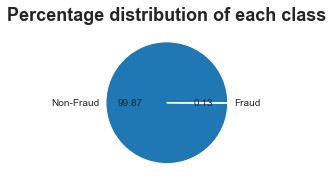

In [10]:
plt.subplot(1,2,2)
plt.pie(df['isFraud'].value_counts(), labels=['Non-Fraud','Fraud'], autopct='%.2f')
plt.title('Percentage distribution of each class', fontsize=18, fontweight='bold')
plt.show()

<b> The total data is divided into 5 type of transactions.This graph shows the same.

C:\Users\AMRUTA DESAI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


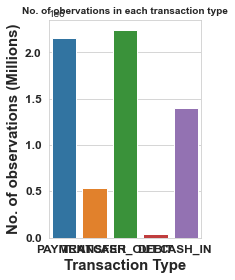

<Figure size 720x720 with 0 Axes>

In [11]:
plt.subplot(1,2,1)
ax = sns.countplot(df['type'])
plt.xlabel('Transaction Type', fontsize=15, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.ylabel('No. of observations (Millions)', fontsize=15, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title('No. of obervations in each transaction type', fontsize=10, fontweight='bold')
plt.figure(figsize=(10,10))
plt.show()

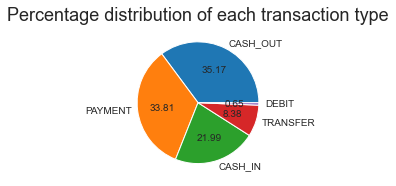

In [12]:
plt.subplot(1,2,2)
plt.pie(df['type'].value_counts(), labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'], autopct='%.2f')
plt.title('Percentage distribution of each transaction type', fontsize=18)
plt.show()

<b> Having seen the distribution lets see in which type the fraudulent behaviour is more? 

In [13]:
pd.crosstab(df['type'], df['isFraud'])

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


<b>Fraud occurs only in 2 type of transactions:    
TRANSFER and CASH_OUT
    
The number of fraudulent TRANSFERs = 4097

The number of fraudulent CASH_OUTs = 4116

<b> As its observed only in above two lets convert them to columns and eliminate the remaining all. This will make our model more accurate and contain only important factors. 

In [14]:
df['TRANSFER']=df['type'].apply(lambda x: 1 if x=='TRANSFER' else 0)
df['CASH_OUT']=df['type'].apply(lambda x: 1 if x=='CASH_OUT' else 0)

<b> Another analysis that can be interesting is at which hour of a day, the fraud attacks generally happen. From the step variable, we can get the hour of day. The below plot shows the frauds at different hours of day. It tells that frauds happen during sleeping hours the most. Close to 20% of transactions that happen during 4 AM and 5 AM are fraud transactions.

In [15]:
df['Hour'] = df['step'].apply(lambda x: x % 24)

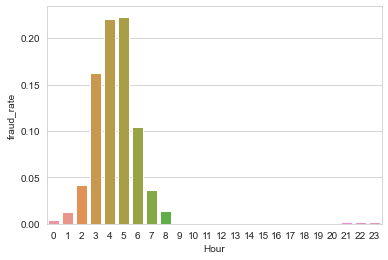

In [16]:
df["Hour"] = df.step % 24
frauds_hour = pd.concat([df.groupby("Hour")["isFraud"].sum(),df.groupby("Hour")["isFraud"].count()],axis=1)
frauds_hour.columns = ["Frauds","Transactions"]
frauds_hour["fraud_rate"] = frauds_hour.Frauds/frauds_hour.Transactions
sns.barplot(x=frauds_hour.index,y=frauds_hour.fraud_rate)
plt.show()

<h2> <font color="blue"> Data Cleaning and Preparation </font>

<b> There are three categorical features present in the data - 'type', 'nameOrig' and 'nameDest'. 'nameOrig' and 'nameDest' are ignored during this exercise because it is very memory and time-consuming to work with millions of unique categories.
'isFlaggedFraud' is misguiding as these may not be fraudulent but just perceived by the system.Thus all these factors dont add a valuable information and thus are eliminated.

In [17]:
df.drop(['nameOrig','nameDest','type','isFlaggedFraud','step'], axis=1,inplace=True)

In [18]:
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,TRANSFER,CASH_OUT,Hour
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1
2,181.00,181.0,0.00,0.0,0.0,1,1,0,1
3,181.00,181.0,0.00,21182.0,0.0,1,0,1,1
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1


In [19]:
df.tail()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,TRANSFER,CASH_OUT,Hour
6362615,339682.13,339682.13,0.0,0.00,339682.13,1,0,1,23
6362616,6311409.28,6311409.28,0.0,0.00,0.00,1,1,0,23
6362617,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0,1,23
6362618,850002.52,850002.52,0.0,0.00,0.00,1,1,0,23
6362619,850002.52,850002.52,0.0,6510099.11,7360101.63,1,0,1,23


<h2> <font color="blue"> Training and Testing </font>

In [20]:
df_X=df.loc[:, df.columns !='isFraud']
df_Y=df[['isFraud']]

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score,accuracy_score

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(df_X,df_Y, test_size=0.3, random_state=0)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4453834, 8)
(1908786, 8)
(4453834, 1)
(1908786, 1)


<h3> 1. Using Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log = LogisticRegression()
log.fit(X_train,Y_train)

C:\Users\AMRUTA DESAI\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [26]:
Y_pred=log.predict(X_test)
Y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
lr = accuracy_score(Y_test,Y_pred)
print(lr*100,"%")

99.8439322166026 %


<h3> 2. Using Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lin = LinearRegression()
lin.fit(X_train,Y_train)

LinearRegression()

In [30]:
Y_pred2=lin.predict(X_test)
Y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [31]:
lin_r = accuracy_score(Y_test,Y_pred)
print(lin_r*100,"%")

99.8439322166026 %


<h3> 3.Using XGBoost Classifier

In [32]:
import xgboost as xgb
from xgboost import XGBClassifier

In [33]:
xgb_clf=XGBClassifier(n_estimators=20,max_depth=10,random_state=42)
xgb_clf.fit(X_train,Y_train)

C:\Users\AMRUTA DESAI\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\AMRUTA DESAI\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[17:38:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)

In [34]:
Y_pred4=xgb_clf.predict(X_test)
Y_pred4[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [35]:
xgbc= accuracy_score(Y_test,Y_pred4)
print(xgbc*100,"%")

99.97270516443436 %


In [36]:
cm = metrics.confusion_matrix(Y_test,Y_pred4)
print(cm)

[[1906288      79]
 [    442    1977]]


In [37]:
from sklearn.metrics import confusion_matrix

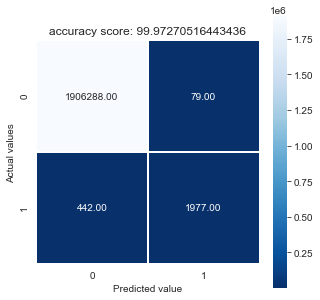

In [38]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='.2f',linewidth=0.5,square=True,cmap='Blues_r')
plt.xlabel('Predicted value')
plt.ylabel('Actual values')
all_sampl_title= 'accuracy score: {0}' .format(xgbc*100)
plt.title(all_sampl_title);

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(Y_test, Y_pred4, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1906367
       Fraud       0.96      0.82      0.88      2419

    accuracy                           1.00   1908786
   macro avg       0.98      0.91      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



    Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. “For all instances that were actually positive, what percent was classified correctly?"
    
    Precision is the ability of a classifier not to label an instance positive that is actually negative. Basically, it is defined as as the ratio of true positives to the sum of true and false positives. “For all instances classified positive, what percent was correct?”    
    
    F1 Score: The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0 . Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation



<h3> <font color="blue"> Conclusions:  </h3>
Fraud is a very rare event, approximately only 1 in 1,000 transactions is a fraudulent. Identifying fraudulent transactions could be challenging due to its highly rare nature.
    
<h5><b>Where does fraud happen?</h5>

1.Fraud is observed in Cash Out and Transfer type transactions only.
    
2.Also, fraud is observed in Customer 2 Customer transactions only.
    
<h5>When does fraud happend?</h5>

1.Majority of fraudulent transactions happen during night.
    
2.Fraudulent transactions peak between 3am and 6am, and goes as high as 58% of transactions.
    
3.Less than 1% of transactions during day are fraudulent.
    
    
<b>With the advent of digital transactions, the possibility of money laundering have also soared up with the use of tech. Millions of investigators are on the field fighting against the fraudulent transactions. In the current industry we have a large inflow of false positives hits and it consumes a long time to clear the false positive hits. Customers across the world using fintech platforms demand lightning fast services. Hence automating the hits with machine learning and reducing the false positive hits is our aim. But not at the cost of leaving out the false negatives. Hence we need to be more mindful about false negatives when we try to reduce the false positives.This is the thing companies can focus on while it updates its infrastructure.